In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm

## investigating volatility linkages between oil, gas, and regionalised coal futures markets ##

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_rr.csv'

df_rr = pd.read_csv(url)
df_rr["DATE"] = pd.to_datetime(df_rr["DATE"],dayfirst=True)
for col in df_rr.columns[1:]:
    df_rr[col] = pd.to_numeric(df_rr[col],errors='coerce')

print(df_rr)

           DATE     WTI_HH   NCF_RCF   NCF_WTI     NCF_HH    NCF_NBP  \
0    2009-01-05   8.337907  0.920024  1.597408  13.319039   9.317755   
1    2009-01-06   7.960656  0.918079  1.673188  13.319672   9.094982   
2    2009-01-07   7.258065  0.911884  1.839766  13.353141   8.969184   
3    2009-01-08   6.993289  0.942262  1.898992  13.280201   9.340782   
4    2009-01-09   7.266071  0.920958  1.889899  13.732143   9.019865   
...         ...        ...       ...       ...        ...        ...   
2850 2020-08-25  16.996063  1.017382  1.152421  19.586614  15.375235   
2851 2020-08-26  17.146825  1.015322  1.150197  19.722222  15.008563   
2852 2020-08-27  17.015873  1.018405  1.161381  19.761905  14.134232   
2853 2020-08-28  17.463415  0.969349  1.177840  20.569106  13.098330   
2854 2020-08-31  18.526087  0.982042  1.219197  22.586957  13.412611   

         NCF_B     RCF_B    RCF_NBP     WTI_B  ...  NCF_RCF_r  NCF_WTI_r  \
0     1.564893  1.700927  10.127733  0.979645  ...   1.0573

In [3]:
## markov regime switching for price ratio returns ##

mod = sm.tsa.MarkovRegression(df_rr['RCF_HH'], k_regimes=3, order=1, switching_variance=True)
res_mod = mod.fit()
res_mod.summary()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/regime_switching/markov_switching.py:1283: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/stats

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                 RCF_HH   No. Observations:                 2855
Model:               MarkovRegression   Log Likelihood               -7218.893
Date:                Mon, 28 Feb 2022   AIC                          14461.786
Time:                        11:45:23   BIC                          14533.268
Sample:                             0   HQIC                         14487.563
                               - 2855                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.1532      0.138    117.057      0.000      15.883      16.424
sigma2         2.9011      0.275     10.538      0.000       2.362       3.441
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1702      0.066    322.167      0.000      21.041      21.299
sigma2         2.4290      0.135     18.058      0.000       2.165       2.693
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8881      0.141    212.362      0.000      29.612      30.164
sigma2        25.3507      0.952     26.630      0.000      23.485      27.216
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9819      0.001    787.804      0.000       0.979       0.984
p[1->0]        0.0066      0.003      2.548      0.011       0.002       0.012
p[2->0]     2.498e-09        nan        nan        nan         nan         nan
p[0->1]        0.0181      0.000     43.865      0.000       0.017       0.019
p[1->1]        0.9781      0.005    212.644      0.000       0.969       0.987
p[2->1]        0.0121      0.003      4.136      0.000       0.006       0.018
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [4]:
print(res_mod.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:} &     RCF\_HH      & \textbf{  No. Observations:  } &    2855     \\
\textbf{Model:}         & MarkovRegression & \textbf{  Log Likelihood     } & -7218.893   \\
\textbf{Date:}          & Mon, 28 Feb 2022 & \textbf{  AIC                } & 14461.786   \\
\textbf{Time:}          &     11:45:49     & \textbf{  BIC                } & 14533.268   \\
\textbf{Sample:}        &        0         & \textbf{  HQIC               } & 14487.563   \\
\textbf{}               &      - 2855      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const}  &      16.1532  &        0.138     &   117.057  &         0.000        &       15.883    &       16.424     \\
\textbf{sigma2} &       2.9011  &        0.275     &    10.538  &         0.000    

<AxesSubplot:title={'center':'Probability of being in the high regime'}>

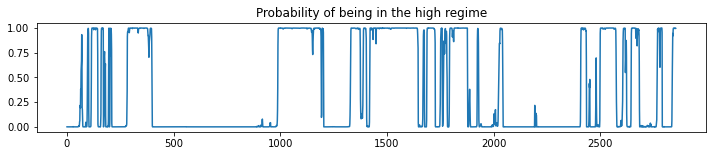

In [5]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in the high regime', figsize=(12,2))

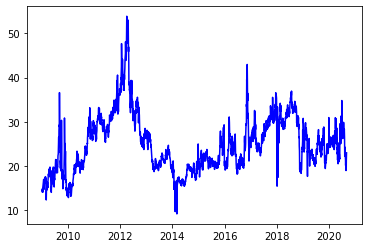

In [6]:
plt.plot(df_rr['DATE'],df_rr['RCF_HH'],color='blue')